# Notebook D: Analysis of NADPH and Acetyl-CoA sources and sinks
This Jupyter notebook is centered around the analysis of key metabolic intermediates, NADPH and Acetyl-CoA, in Yarrowia lipolytica when metabolizing different substrates like glucose, glycerol, and oleic acid. The focus is on identifying and quantifying the major sources and sinks of these intermediates within the cellular metabolism, utilizing the genome-scale metabolic model (GSM) of Y. lipolytica.

### Objective
The primary goal of this analysis is to elucidate the metabolic pathways contributing to the synthesis and consumption of NADPH and Acetyl-CoA. This understanding is vital for metabolic engineering efforts aimed at optimizing the production of bio-based chemicals and fuels in Y. lipolytica.

### Key Functions
`get_sources_and_sinks`: Identifies the reactions acting as sources and sinks for a specified metabolite within the metabolic network. This function is crucial for mapping the metabolic flux of NADPH and Acetyl-CoA in different conditions.


### Load imports

In [1]:
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import sys

source_dir = '../src'
sys.path.append(source_dir)

### Load the genome scale model

In [2]:
model = cobra.io.json.load_json_model('../genome_scale_models/iYLI647_corr_3.json')

### Keep reaction ids consistent

In [3]:
model.reactions.get_by_id('EX_glc(e)').id  = 'EX_glc_e'
model.reactions.get_by_id('EX_glyc(e)').id = 'EX_glyc_e'
model.reactions.get_by_id('EX_ocdcea(e)').id = 'EX_ocdcea_e'
model.reactions.get_by_id('EX_h2o(e)').id = 'EX_h2o_e'
model.reactions.get_by_id('EX_h(e)').id = 'EX_h_e'
model.reactions.get_by_id('EX_nh4(e)').id = 'EX_nh4_e'
model.reactions.get_by_id('EX_o2(e)').id = 'EX_o2_e'
model.reactions.get_by_id('EX_pi(e)').id = 'EX_pi_e'
model.reactions.get_by_id('EX_so4(e)').id = 'EX_so4_e'

# print an example reaction
model.reactions.get_by_id('EX_glc_e')

Reaction identifier,EX_glc_e
Name,D Glucose exchange
Memory address,0x2a7d4b700
Stoichiometry,glc_D[e] <=> D_Glucose <=>
GPR,YALI0D01111g or YALI0D18876g or YALI0D00132g or YALI0B01342g or YALI0E23287g or YALI0B00396g or...
Lower bound,-10.0
Upper bound,1000.0


### Load Central Flux Data

In [4]:
# open biomass cutoff data and 13C-MFA constrained data
biomass_cutoff_gsm_central_df = pd.read_csv('../results/central_fluxes/mfa_bounds_from_gsm_01192024.csv')
mfa_constrainted_gsm_central_df = pd.read_csv('../results/central_fluxes/mfa_constrained_gsm_central_bounds_01212024.csv')

display(biomass_cutoff_gsm_central_df.head())
display(mfa_constrainted_gsm_central_df.head())

,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Oleic Acid MFA UB,Glucose GSM LB,Glucose GSM UB,Glucose_mfa_bound_feasibility,Glycerol GSM LB,Glycerol GSM UB,Glycerol_mfa_bound_feasibility,Oleic Acid GSM LB,Oleic Acid GSM UB,Oleic Acid_mfa_bound_feasibility
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.0000,100.0000,NaN,...,NaN,100.000000,100.000000,fully feasible,0.000000,-0.000000,NaN,0.000000,-0.000000,NaN
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,NaN,-26.574563,-0.000000,NaN,100.000000,100.000000,fully feasible,-67.583966,-0.000000,NaN
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,100.0000,0.000000,-0.000000,NaN,0.000000,-0.000000,NaN,100.000000,100.000000,fully feasible
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0496,9.7776,23.5421,-41.3947,...,-265.6116,-190.412199,92.008809,fully feasible,-96.832349,-3.061031,fully feasible,-549.764335,-24.440384,fully feasible


,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Glycerol MFA UB,Oleic Acid MFA Flux,Oleic Acid MFA LB,Oleic Acid MFA UB,Glucose MFA-Constrained GSM LB,Glucose MFA-Constrained GSM UB,Glycerol MFA-Constrained GSM LB,Glycerol MFA-Constrained GSM UB,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.000,100.0000,NaN,...,NaN,NaN,NaN,NaN,100.00000,100.0000,0.000000,-0.000000,0.000000,-0.000
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,100.0000,NaN,NaN,NaN,-6.27350,-0.0000,100.000000,100.000000,-0.063537,-0.000
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,100.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,NaN,100.0000,100.0000,100.000,0.00000,-0.0000,0.000000,-0.000000,100.000000,100.000
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0175,9.792,23.5403,-41.3947,...,-36.5906,-305.8491,-319.0201,-256.517,21.59084,23.5403,-36.776517,-31.998287,-257.125896,-256.517


In [5]:
central_rxn_df = mfa_constrainted_gsm_central_df.copy()

# add columns from biomass_cutoff_gsm_central_df to mfa_constrainted_gsm_central_df
central_rxn_df['Glucose Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Glucose GSM LB']
central_rxn_df['Glucose Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Glucose GSM UB']

central_rxn_df['Glycerol Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Glycerol GSM LB']
central_rxn_df['Glycerol Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Glycerol GSM UB']

central_rxn_df['Oleic Acid Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Oleic Acid GSM LB']
central_rxn_df['Oleic Acid Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Oleic Acid GSM UB']

central_rxn_df.head()

,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Glycerol MFA-Constrained GSM LB,Glycerol MFA-Constrained GSM UB,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB,Glucose Biomass Cutoff GSM LB,Glucose Biomass Cutoff GSM UB,Glycerol Biomass Cutoff GSM LB,Glycerol Biomass Cutoff GSM UB,Oleic Acid Biomass Cutoff GSM LB,Oleic Acid Biomass Cutoff GSM UB
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.000,100.0000,NaN,...,0.000000,-0.000000,0.000000,-0.000,100.000000,100.000000,0.000000,-0.000000,0.000000,-0.000000
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,100.000000,100.000000,-0.063537,-0.000,-26.574563,-0.000000,100.000000,100.000000,-67.583966,-0.000000
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,0.000000,-0.000000,100.000000,100.000,0.000000,-0.000000,0.000000,-0.000000,100.000000,100.000000
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0175,9.792,23.5403,-41.3947,...,-36.776517,-31.998287,-257.125896,-256.517,-190.412199,92.008809,-96.832349,-3.061031,-549.764335,-24.440384


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_rxn_gsm_bounds(ax=None, row=None, substrate=None, title=None):
    if substrate not in ['Glucose', 'Glycerol', 'Oleic Acid']:
        raise ValueError("Substrate must be 'Glucose', 'Glycerol', or 'Oleic Acid'")
    
    # Define labels for lower and upper bounds
    lb_label = f'{substrate} MFA LB'
    ub_label = f'{substrate} MFA UB'
    gsm_lb_label = f'{substrate} MFA-Constrained GSM LB'
    gsm_ub_label = f'{substrate} MFA-Constrained GSM UB'
    biomass_lb_label = f'{substrate} Biomass Cutoff GSM LB'
    biomass_ub_label = f'{substrate} Biomass Cutoff GSM UB'

    # Extract values for the horizontal lines
    lb = row[lb_label]
    ub = row[ub_label]
    gsm_lb = row[gsm_lb_label]
    gsm_ub = row[gsm_ub_label]
    biomass_lb = row[biomass_lb_label]
    biomass_ub = row[biomass_ub_label]

    # Define y-intercepts for each category
    y_biomass = 2.65
    y_mfa = 1.9
    y_mfa_constrained = 1.25

    # Plot horizontal lines
    ax.hlines(y=y_biomass, xmin=biomass_lb, xmax=biomass_ub, color='k', linestyle='-', linewidth=10)
    ax.hlines(y=y_mfa, xmin=lb, xmax=ub, color='k', linestyle='-', linewidth=10)
    ax.hlines(y=y_mfa_constrained, xmin=gsm_lb, xmax=gsm_ub, color='k', linestyle='-', linewidth=10)

    # Hide the top, right, and left spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove y-axis ticks
    ax.set_yticks([])

    # Calculate center positions for the text
    center_biomass = (biomass_lb + biomass_ub) / 2
    center_mfa = (lb + ub) / 2
    center_mfa_constrained = (gsm_lb + gsm_ub) / 2

    # Add custom text annotations for each label
    padding = .1
    ax.text(x=center_biomass, y=y_biomass - padding, s='GSM FVA w/ Biomass Cutoff', ha='center', va='top', fontsize=10)
    ax.text(x=center_mfa, y=y_mfa + padding, s='13C-MFA', ha='center', va='bottom', fontsize=10)
    ax.text(x=center_mfa_constrained, y=y_mfa_constrained + padding, s='GSM FVA w/ MFA-Constraints', ha='center', va='bottom', fontsize=10)

    # Calculate the x-axis limits dynamically for each reaction
    all_bounds = [lb, ub, gsm_lb, gsm_ub, biomass_lb, biomass_ub]
    min_bound = min(all_bounds)
    max_bound = max(all_bounds)
    padding = (max_bound - min_bound) * 0.1  # Adding 10% padding to each side
    ax.set_xlim(min_bound - padding, max_bound + padding)

    ax.set_ylim(1, 3)

    # Set labels for x-axis and title
    ax.set_xlabel(f'Flux Normalized to 100mmols of {substrate}')
    if title:
        ax.set_title(title, fontweight='bold', fontsize=12)
    else: 
        ax.set_title(row['Equation'], fontweight='bold', fontsize=12)


def plot_rxn_gsm_bounds_grid(central_rxn_df=None, substrate=None):
    # Set up the grid dimensions
    n_rows = 16  # Adjust based on the actual number of plots
    n_cols = 3
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Adjust width as needed
    axs = axs.flatten()  # Flatten the array of axes for easy iteration

    # Define labels for lower and upper bounds
    lb_label = f'{substrate} MFA LB'
    ub_label = f'{substrate} MFA UB'
    gsm_lb_label = f'{substrate} MFA-Constrained GSM LB'
    gsm_ub_label = f'{substrate} MFA-Constrained GSM UB'
    biomass_lb_label = f'{substrate} Biomass Cutoff GSM LB'
    biomass_ub_label = f'{substrate} Biomass Cutoff GSM UB'

    # Plot each subplot
    plot_idx = 0
    for index, row in central_rxn_df.iterrows():
        

        # Extract values for the horizontal lines
        lb = row[lb_label]
        ub = row[ub_label]
        gsm_lb = row[gsm_lb_label]
        gsm_ub = row[gsm_ub_label]
        biomass_lb = row[biomass_lb_label]
        biomass_ub = row[biomass_ub_label]

        # check if any values are NaN
        if any(pd.isnull([lb, ub, gsm_lb, gsm_ub, biomass_lb, biomass_ub])):
            continue
        elif row['Pathway'] == 'uptake':
            continue
        elif row['Pathway'] == 'biomass formation':
            title = "Biomass Formation"
            plot_rxn_gsm_bounds(axs[plot_idx], row=row, substrate=substrate, title=title)
            plot_idx += 1
        else:
            plot_rxn_gsm_bounds(axs[plot_idx], row=row, substrate=substrate)
            plot_idx += 1

    # Hide any unused axes
    for ax in axs[plot_idx:]:
        ax.set_visible(False)

    # Adjust layout with increased vertical spacing
    plt.subplots_adjust(hspace=0.5)  # Increase horizontal spacing between plots

    # Show the plot
    plt.show()

### Plot Glucose GSM and MFA flux bounds 

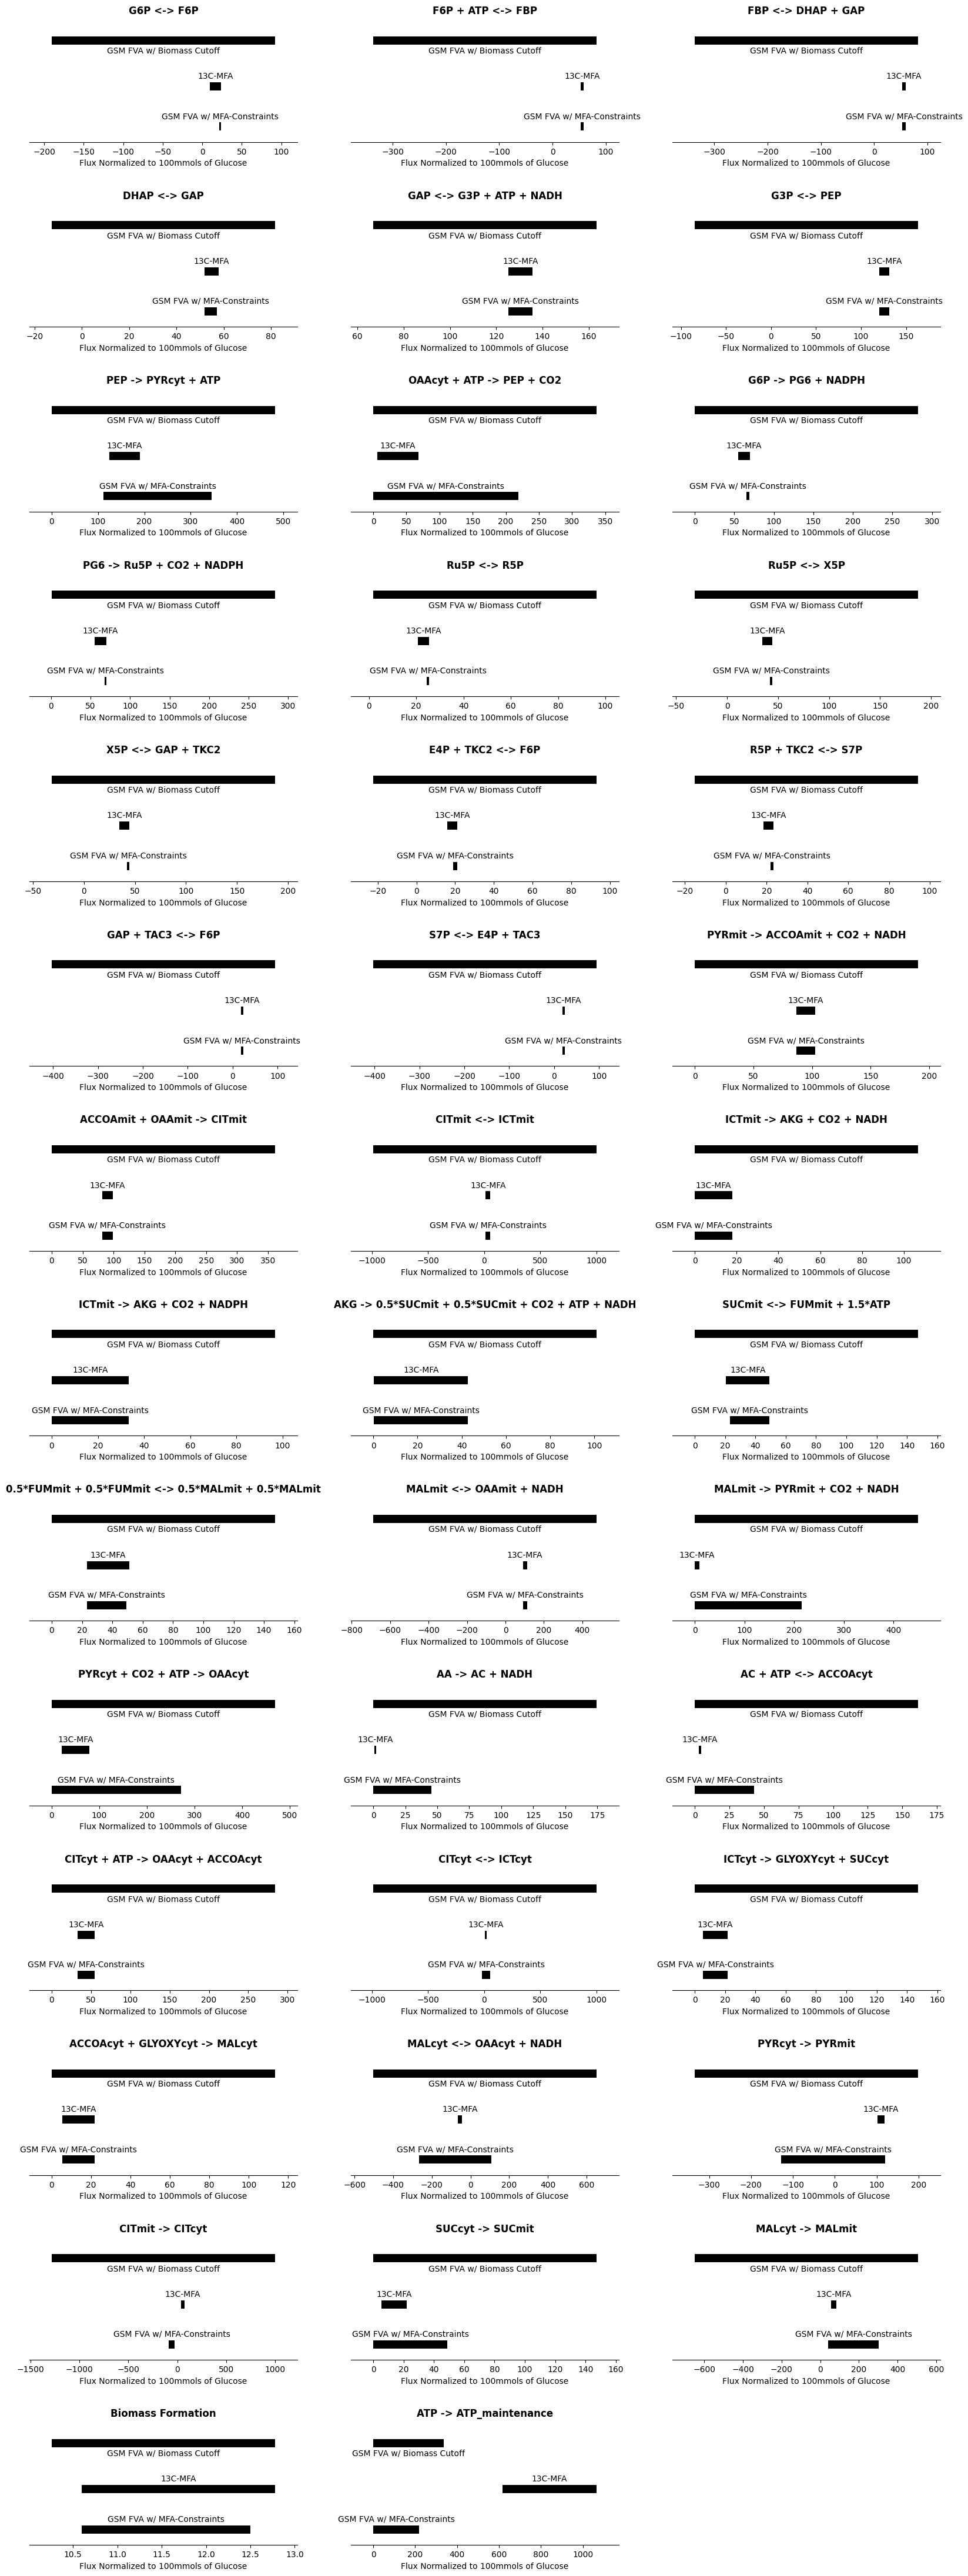

In [7]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Glucose')

### Plot Glycerol GSM and MFA flux bounds 

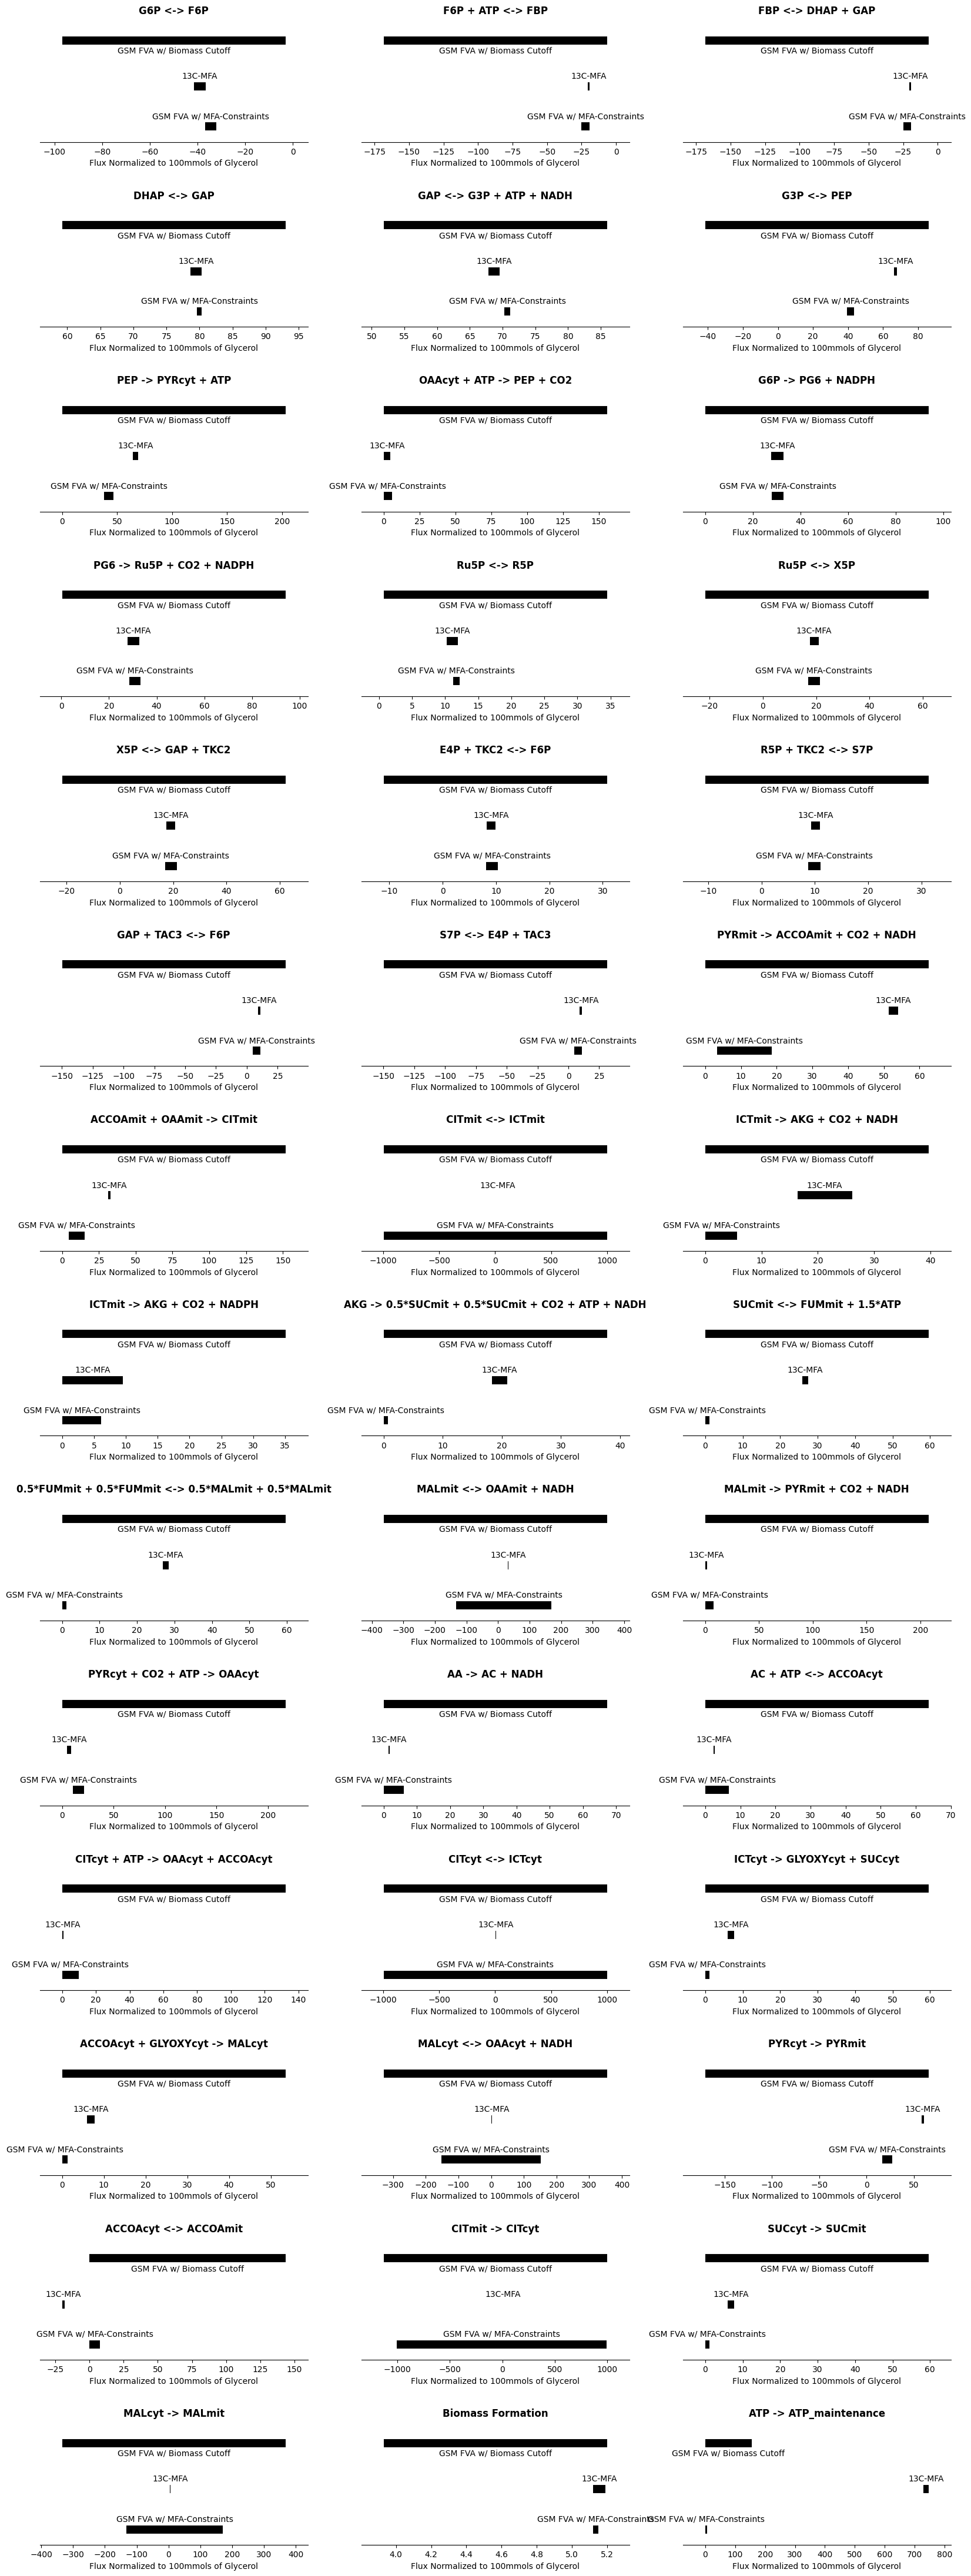

In [8]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Glycerol')

### Plot Oleic Acid GSM and MFA flux bounds 

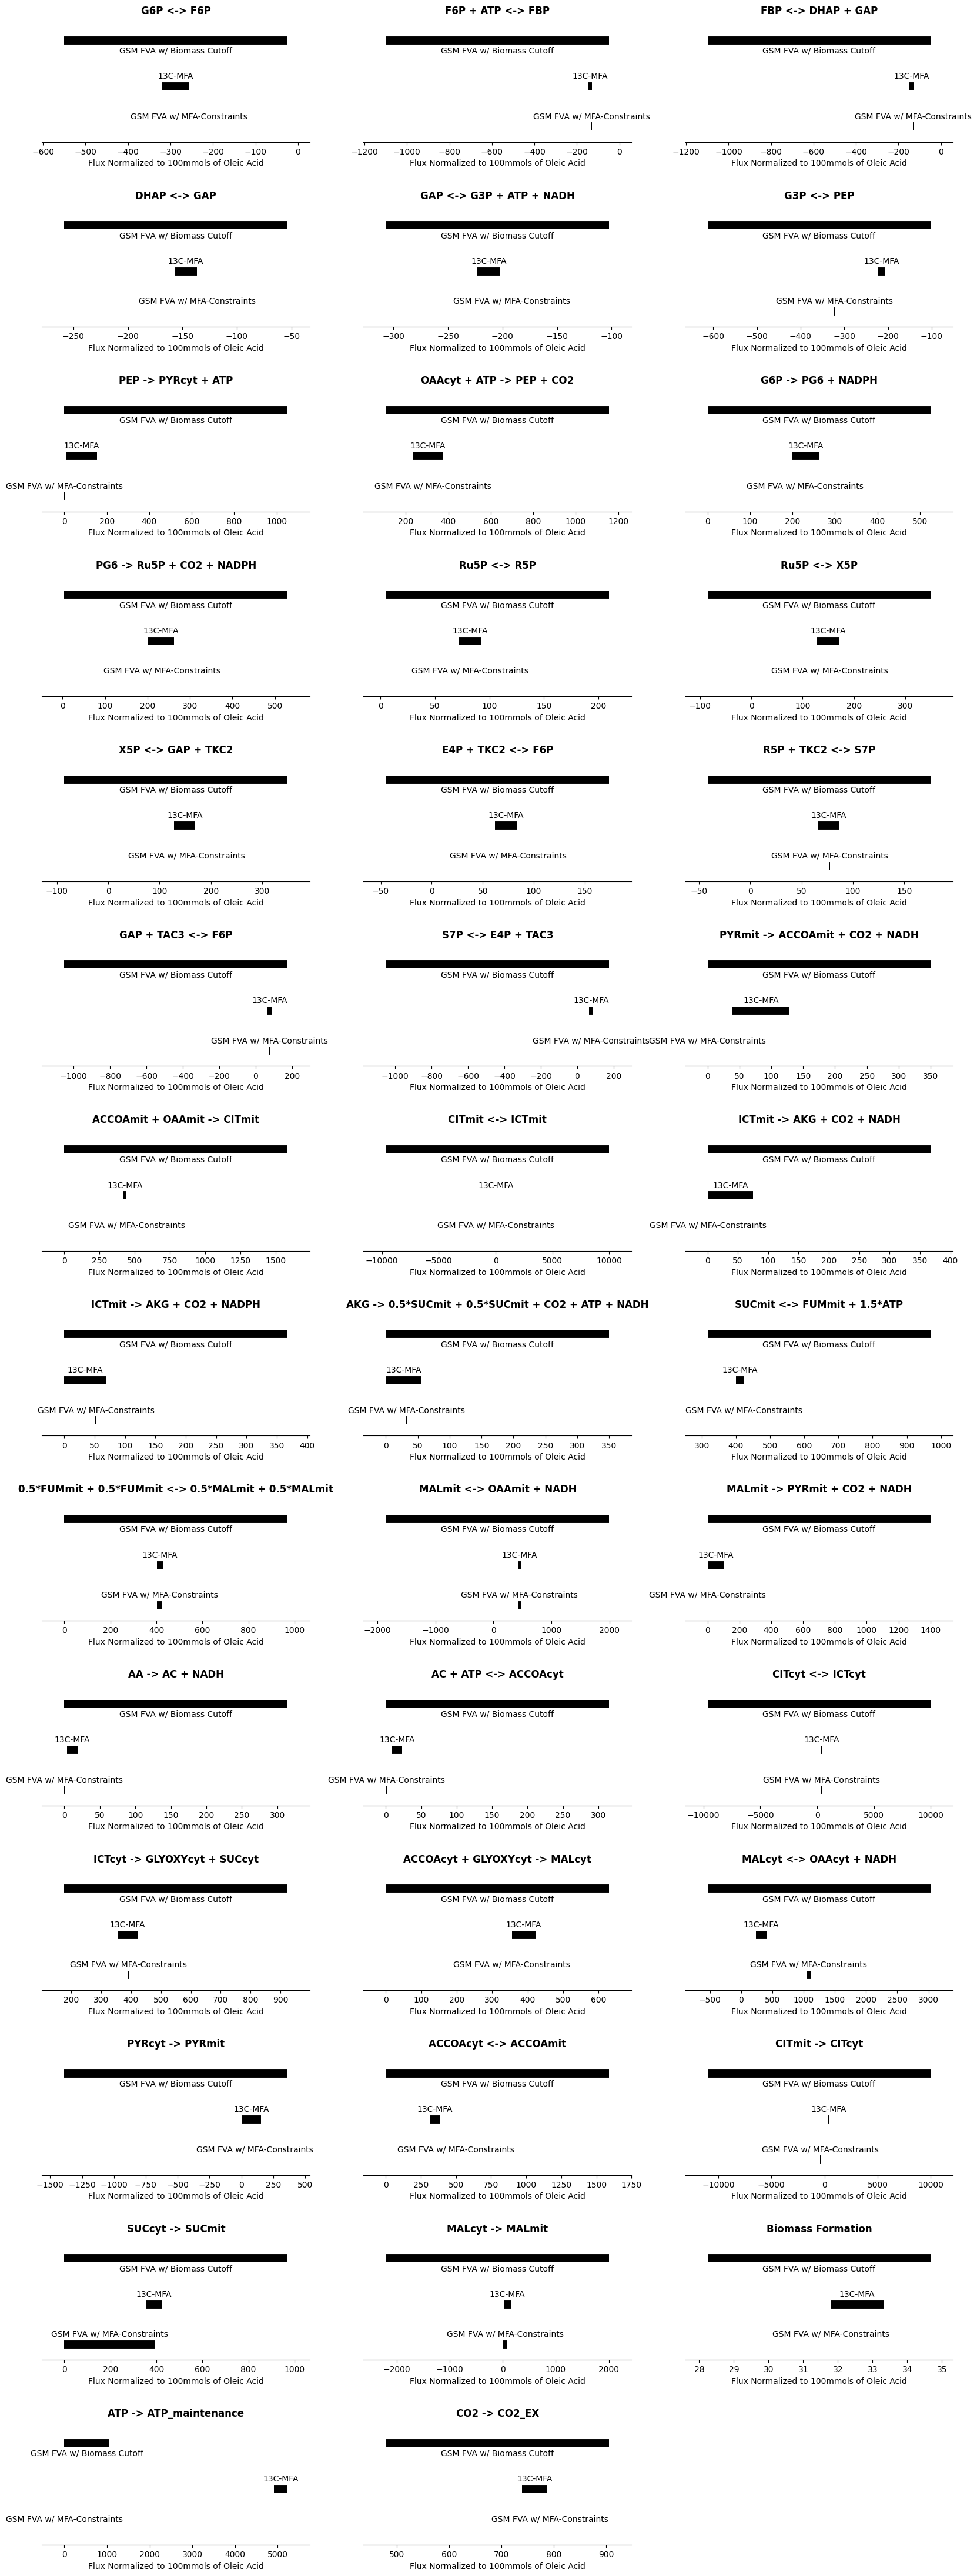

In [9]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Oleic Acid')

### Load pFBA and E-Flux2 Data

In [ ]:
glucose_df = pd.read_csv('../results/gsm_fluxes/glucose_gsm_fluxes.csv')
glycerol_df = pd.read_csv('../results/gsm_fluxes/glycerol_gsm_fluxes.csv')
oleic_acid_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_gsm_fluxes.csv')
glucose_df

### 

### Define a function to get the sources and sinks of a given metabolite 

In [ ]:
# Define a function to get the sources and sinks of a given metabolite 
def get_sources_and_sinks(df, column_name, metabolite_id):
    metabolite = model.metabolites.get_by_id(metabolite_id)

    # make empty source and sink dataframes
    sources = []
    sinks = []

    # loop over rows of the dataframe
    for _, row in df.iterrows():
        reaction_id = row['reaction_id']
        reaction = model.reactions.get_by_id(reaction_id)
        flux = row[column_name]

        # check if the metabolite is in the reaction
        if metabolite not in reaction.metabolites:
            continue
        else:
            metabolite_coefficient = reaction.metabolites[metabolite]
            if flux * metabolite_coefficient > 0:
                sources.append({
                    'reaction_id': reaction_id,
                    'reaction_name': reaction.name,
                    'full_reaction': reaction.reaction,
                    'metabolite_coefficient': metabolite_coefficient,
                    'flux': flux,
                    'total_flux': flux * metabolite_coefficient,
                })
            else:
                sinks.append({
                    'reaction_id': reaction_id,
                    'reaction_name': reaction.name,
                    'full_reaction': reaction.reaction,
                    'metabolite_coefficient': metabolite_coefficient,
                    'flux': flux,
                    'total_flux': flux * metabolite_coefficient,
                })

    source_df = pd.DataFrame(sources)
    sink_df = pd.DataFrame(sinks)

    # sort the dataframes by absolute value of total flux
    source_df = source_df.assign(abs_total_flux=source_df.total_flux.abs())
    source_df = source_df.sort_values('abs_total_flux', ascending=False)

    sink_df = sink_df.assign(abs_total_flux=sink_df.total_flux.abs())
    sink_df = sink_df.sort_values('abs_total_flux', ascending=False)
    
    return source_df, sink_df

sources, sinks = get_sources_and_sinks(glucose_df, 'glucose_pfba_flux', 'nadph[c]')

print('sources')
display(sources)
print('sinks')
display(sinks)

In [ ]:
sources, sinks = get_sources_and_sinks(glucose_df, 'glucose_pfba_flux', 'nadph[m]')

print('sources')
display(sources)
print('sinks')
display(sinks)

### Look at oleic acid NADPH sources and sinks

In [ ]:
sources, sinks = get_sources_and_sinks(oleic_acid_df, 'oleic_acid_pfba_flux', 'nadph[c]')

print('sources')
display(sources)
print('sinks')
display(sinks)

In [ ]:
sources, sinks = get_sources_and_sinks(oleic_acid_df, 'oleic_acid_pfba_flux', 'nadph[m]')

print('sources')
display(sources)
print('sinks')
display(sinks)

In [ ]:
# get sum of absolute values of fluxes for both dfs
sources_sum = sources['total_flux'].abs().sum()
sinks_sum = sinks['total_flux'].abs().sum()

# print the sum of fluxes
print('sources sum: ', sources_sum)
print('sinks sum: ', sinks_sum)

In [ ]:
len(sources)